# 데이터 불러오기

In [11]:
import pandas as pd
df = pd.read_csv('./datas/train_df.csv', index_col=0)
# test = pd.read_csv('./datas/test_df.csv', index_col=0) # 현 단계에서는 필요 없음

In [12]:
df.head()

,Survived,Pclass,Sex,Embarked,Title,AgeBand,Family,Alone,FareBand
0,0,3,1,1,1,3,2,0,1
1,1,1,2,2,2,4,2,0,1
2,1,3,2,1,3,3,1,1,1
3,1,1,2,1,2,4,2,0,1
4,0,3,1,1,1,4,1,1,1


In [15]:
# 세부 정보 X
X = df.iloc[:,1:]

# 생존 여부 y
y = df.iloc[:,0]


# 학습 및 테스트 셋 준비

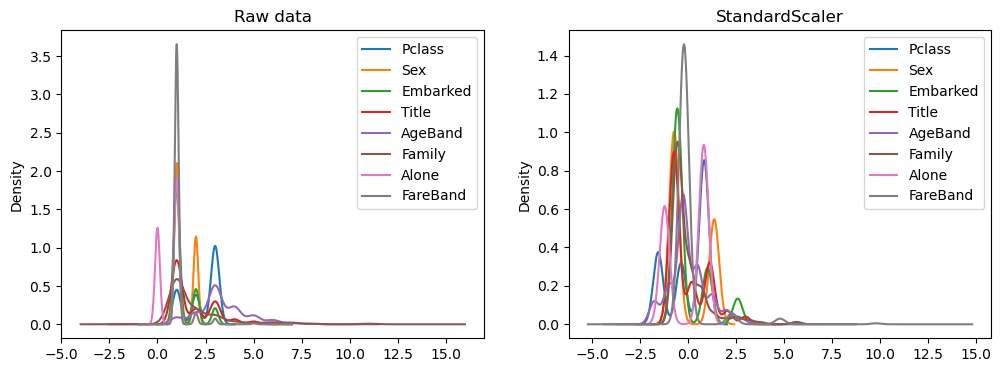

In [16]:
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
scaled_X = pd.DataFrame(ss.fit_transform(X), columns=X.columns)

fig, ax = plt.subplots(1, 2, figsize=(12,4))
X.plot(kind='kde', title='Raw data', ax=ax[0])
scaled_X.plot(kind='kde', title='StandardScaler', ax=ax[1])
plt.show()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [19]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(668, 8) (668,)
(223, 8) (223,)


## 0. 로지스틱 회귀

In [50]:
from sklearn.linear_model import LogisticRegression # 임포트
classifier = LogisticRegression() # 객체 생성
classifier.fit(X_train, y_train) # 학습

y_pred = classifier.predict(X_test) # 테스트 셋 적용

skf = StratifiedKFold(n_splits=10, shuffle=True)  # 계층별 교차 검증 설정

accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=skf) # 정확도 계산

print("Accuracy: {:.2f} %".format(accuracies.mean()*100)) # 정확도 출력
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100)) # 표준편차 출력

Accuracy: 80.40 %
Standard Deviation: 4.25 %


In [51]:
coeff_df = pd.DataFrame(df.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(classifier.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
1,Sex,2.065021
3,Title,0.476638
2,Embarked,0.146942
7,FareBand,0.109188
4,AgeBand,-0.239855
5,Family,-0.435765
6,Alone,-0.770335
0,Pclass,-0.903679


- 로지스틱 회귀에서 생존율에 영향을 끼치는 가장 큰 요인은 성별임

## 1. 결정 트리 분류

In [48]:
from sklearn.tree import DecisionTreeClassifier # 임포트
classifier = DecisionTreeClassifier() # 객체 생성
classifier.fit(X_train, y_train) # 학습

y_pred = classifier.predict(X_test) # 테스트 셋 적용

skf = StratifiedKFold(n_splits=10, shuffle=True)  # 계층별 교차 검증 설정

accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=skf) # 정확도 계산

print("Accuracy: {:.2f} %".format(accuracies.mean()*100)) # 정확도 출력
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100)) # 표준편차 출력

Accuracy: 79.79 %
Standard Deviation: 4.65 %


## 2. 랜덤 포레스트

In [10]:
from sklearn.ensemble import RandomForestClassifier # 임포트
classifier = RandomForestClassifier(n_estimators=50) # 객체 생성
classifier.fit(X_train, y_train) # 학습

y_pred = classifier.predict(X_test) # 테스트 셋 적용

skf = StratifiedKFold(n_splits=10, shuffle=True)  # 계층별 교차 검증 설정

accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=skf) # 정확도 계산

print("Accuracy: {:.2f} %".format(accuracies.mean()*100)) # 정확도 출력
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100)) # 표준편차 출력

Accuracy: 80.09 %
Standard Deviation: 4.79 %


## 3. 가우시안 나이브 베이즈 분류

In [23]:
from sklearn.naive_bayes import GaussianNB # 임포트
classifier = GaussianNB() # 객체 생성
classifier.fit(X_train, y_train) # 학습

y_pred = classifier.predict(X_test) # 테스트 셋 적용

skf = StratifiedKFold(n_splits=10, shuffle=True)  # 계층별 교차 검증 설정

accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=skf) # 정확도 계산

print("Accuracy: {:.2f} %".format(accuracies.mean()*100)) # 정확도 출력
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100)) # 표준편차 출력

Accuracy: 80.70 %
Standard Deviation: 3.93 %


## 4. k-최근접 이웃

In [26]:
import warnings

# 경고 메시지를 무시하고 숨기거나
warnings.filterwarnings(action='ignore')

In [36]:
from sklearn.neighbors import KNeighborsClassifier # 임포트
classifier = KNeighborsClassifier() # 객체 생성
classifier.fit(X_train, y_train) # 학습

y_pred = classifier.predict(X_test) # 테스트 셋 적용

skf = StratifiedKFold(n_splits=10, shuffle=True)  # 계층별 교차 검증 설정

accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=skf) # 정확도 계산

print("Accuracy: {:.2f} %".format(accuracies.mean()*100)) # 정확도 출력
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100)) # 표준편차 출력

Accuracy: 79.20 %
Standard Deviation: 4.70 %


## 5. 에이다 부스트

In [37]:
from sklearn.ensemble import AdaBoostClassifier # 임포트
classifier = AdaBoostClassifier() # 객체 생성
classifier.fit(X_train, y_train) # 학습

y_pred = classifier.predict(X_test) # 테스트 셋 적용

skf = StratifiedKFold(n_splits=10, shuffle=True)  # 계층별 교차 검증 설정

accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=skf) # 정확도 계산

print("Accuracy: {:.2f} %".format(accuracies.mean()*100)) # 정확도 출력
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100)) # 표준편차 출력

Accuracy: 81.89 %
Standard Deviation: 4.36 %


## 6. 이차 판별 분석 분류

In [38]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis # 임포트
classifier = QuadraticDiscriminantAnalysis() # 객체 생성
classifier.fit(X_train, y_train) # 학습

y_pred = classifier.predict(X_test) # 테스트 셋 적용

skf = StratifiedKFold(n_splits=10, shuffle=True)  # 계층별 교차 검증 설정

accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=skf) # 정확도 계산

print("Accuracy: {:.2f} %".format(accuracies.mean()*100)) # 정확도 출력
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100)) # 표준편차 출력

Accuracy: 81.43 %
Standard Deviation: 4.98 %


## 7. 서포트 벡터 머신

In [39]:
from sklearn.svm import SVC # 임포트
classifier = SVC(kernel='linear') # 객체 생성
classifier.fit(X_train, y_train) # 학습

y_pred = classifier.predict(X_test) # 테스트 셋 적용

skf = StratifiedKFold(n_splits=10, shuffle=True)  # 계층별 교차 검증 설정

accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=skf) # 정확도 계산

print("Accuracy: {:.2f} %".format(accuracies.mean()*100)) # 정확도 출력
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100)) # 표준편차 출력

Accuracy: 80.69 %
Standard Deviation: 4.24 %


## 8. 서포트 벡터 머신(RBF 커널)

In [40]:
from sklearn.svm import SVC # 임포트
classifier = SVC(kernel='rbf') # 객체 생성
classifier.fit(X_train, y_train) # 학습

y_pred = classifier.predict(X_test) # 테스트 셋 적용

skf = StratifiedKFold(n_splits=10, shuffle=True)  # 계층별 교차 검증 설정

accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=skf) # 정확도 계산

print("Accuracy: {:.2f} %".format(accuracies.mean()*100)) # 정확도 출력
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100)) # 표준편차 출력

Accuracy: 82.78 %
Standard Deviation: 2.72 %


## 9. 보팅 분류기

In [41]:
from sklearn.ensemble import VotingClassifier # 임포트
clf1 = AdaBoostClassifier()
clf2 = RandomForestClassifier()
clf3 = SVC(kernel='linear')
classifier = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)]) # 객체 생성
classifier.fit(X_train, y_train) # 학습

y_pred = classifier.predict(X_test) # 테스트 셋 적용

skf = StratifiedKFold(n_splits=10, shuffle=True)  # 계층별 교차 검증 설정

accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=skf) # 정확도 계산

print("Accuracy: {:.2f} %".format(accuracies.mean()*100)) # 정확도 출력
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100)) # 표준편차 출력

Accuracy: 82.79 %
Standard Deviation: 4.48 %


## 10. 배깅 분류기

In [42]:
from sklearn.ensemble import BaggingClassifier # 임포트
classifier = BaggingClassifier(base_estimator=SVC(kernel='rbf'), n_estimators=10) # 객체 생성
classifier.fit(X_train, y_train) # 학습

y_pred = classifier.predict(X_test) # 테스트 셋 적용

skf = StratifiedKFold(n_splits=10, shuffle=True)  # 계층별 교차 검증 설정

accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=skf) # 정확도 계산

print("Accuracy: {:.2f} %".format(accuracies.mean()*100)) # 정확도 출력
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100)) # 표준편차 출력

Accuracy: 82.80 %
Standard Deviation: 6.14 %


## ※. 알고리즘 성능 비교

Mean accuracy of LR : 80.70 %
Mean accuracy of D_tree : 79.04 %
Mean accuracy of RF : 81.13 %
Mean accuracy of GNB : 80.25 %
Mean accuracy of KNN : 80.09 %
Mean accuracy of Ada : 80.09 %
Mean accuracy of QDA : 82.49 %
Mean accuracy of SVM_l : 82.19 %
Mean accuracy of SVM_k : 81.28 %
Mean accuracy of Voting : 83.55 %
Mean accuracy of Bagging : 79.49 %


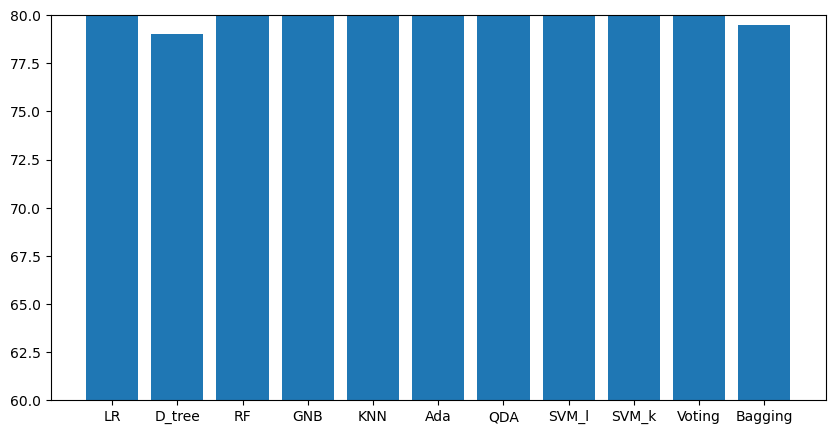

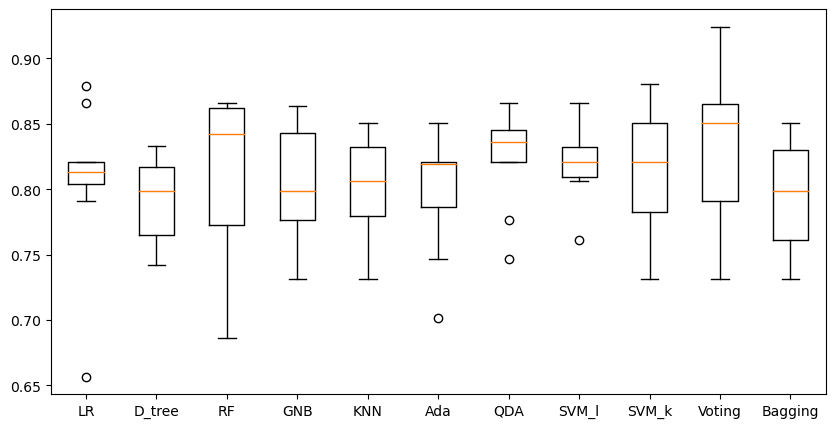

In [52]:
# 분류기 지정
classifiers = [LogisticRegression(), DecisionTreeClassifier(), RandomForestClassifier(), GaussianNB(), KNeighborsClassifier(), SVC(kernel='linear'), SVC(kernel='rbf'), AdaBoostClassifier(), QuadraticDiscriminantAnalysis(), VotingClassifier(estimators=[('1', AdaBoostClassifier()), ('2', RandomForestClassifier()), ('3', SVC(kernel='linear'))]), BaggingClassifier(base_estimator=clf3, n_estimators=10, random_state=0)]

# 분류기 이름 지정
classifier_names = ['LR','D_tree', 'RF', 'GNB', 'KNN', 'Ada', 'QDA', 'SVM_l', 'SVM_k', 'Voting', 'Bagging']

# 리스트 생성
modelaccuracies, modelmeans, modelnames = [], [], []

classifier_data = zip(classifier_names, classifiers)
for classifier_name, classifier in classifier_data:
    skf = StratifiedKFold(n_splits=10, shuffle=True) # 계층별 교차 검증 설정
    accuracies = cross_val_score(classifier, X=X_train, y=y_train, cv=skf) # 정확도 계산
    print("Mean accuracy of", classifier_name, ": {:.2f} %".format(accuracies.mean()*100)) # 평균값 출력

    # 결과 저장
    modelaccuracies.append(accuracies)
    modelnames.append(classifier_name)
    modelmeans.append(accuracies.mean()*100)  

# 평균값 그래프 출력
plt.figure(figsize=(10,5))    
plt.ylim([60, 80])
plt.bar(modelnames, modelmeans)

# 박스 그래프 출력
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.boxplot(modelaccuracies)
ax.set_xticklabels(modelnames)
plt.show()